# Amazon Reviews 2023 - Category EDA

Reusable exploratory data analysis for any category. Update `CATEGORY_NAME` variable.

Analyzes: schema, data quality (nulls, duplicates, outliers), statistics, distributions.


## 1. Import Libraries


In [1]:
import os
from pathlib import Path
import warnings

import rootutils


rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)

ROOT_DIR = Path(os.environ.get("PROJECT_ROOT", Path.cwd()))
print(ROOT_DIR)

F:\big_data_project\amazon-reviews-analysis


In [37]:
import os
from pathlib import Path
import warnings

import rootutils


rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)

ROOT_DIR = Path(os.environ.get("PROJECT_ROOT", Path.cwd()))

REVIEWS_PATH = ROOT_DIR / "data/raw/review_categories/All_Beauty.jsonl"
METADATA_PATH = ROOT_DIR / "data/raw/meta_categories/meta_All_Beauty.jsonl"

warnings.filterwarnings("ignore")

## Initialize Spark


In [38]:
from src.amazon_reviews_analysis.utils import build_spark


spark = build_spark()

print("✓ Spark Session created successfully!")
print(f"Spark Version: {spark.version}")
print(f"Spark App Name: {spark.sparkContext.appName}")
print(f"Spark Master: {spark.sparkContext.master}")
print(f"Spark UI: {spark.sparkContext.uiWebUrl}")

✓ Spark Session created successfully!
Spark Version: 3.5.5
Spark App Name: AmazonReviews
Spark Master: local[*]
Spark UI: http://host.docker.internal:4040


---

# PART A: METADATA

## Load Metadata


In [39]:
from src.amazon_reviews_analysis.utils import load_metadata


print(f"📂 Metadata: {METADATA_PATH}")

metadata_df = load_metadata(spark, METADATA_PATH)
print(f"Total records: {metadata_df.count():,}")

📂 Metadata: F:\big_data_project\amazon-reviews-analysis\data\raw\meta_categories\meta_All_Beauty.jsonl\meta_All_Beauty.jsonl
Total records: 112,590


## Schema & Structure


In [40]:
print("SCHEMA")
print("=" * 80)
metadata_df.printSchema()

print(f"\nColumns: {len(metadata_df.columns)}")
for idx, col_name in enumerate(metadata_df.columns, 1):
    print(f"{idx:2d}. {col_name}")

SCHEMA
root
 |-- author: struct (nullable = true)
 |    |-- about: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- avatar: string (nullable = true)
 |    |-- name: string (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- bought_together: string (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- details: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- hi_res: string (nullable = true)
 |    |    |-- large: string (nullable = true)
 |    |    |-- thumb: string (nullable = true)
 |    |    |-- variant: string (nullable = true)
 |-- main_category: string (

## Sample Data


In [25]:
metadata_df.show(5, truncate=50)

+------+--------------+---------------+----------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+-------------+-----------+-----+-------------+----------------------+--------+--------------------------------------------------+------+
|author|average_rating|bought_together|categories|                                       description|                                           details|                                          features|                                            images|main_category|parent_asin|price|rating_number|                 store|subtitle|                                             title|videos|
+------+--------------+---------------+----------+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+---------------

In [8]:
metadata_df.select(
    "parent_asin", "title", "average_rating", "rating_number", "price"
).show(10, truncate=False)

+-----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-------------+-----+
|parent_asin|title                                                                                                                                                                            |average_rating|rating_number|price|
+-----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+-------------+-----+
|B01CUPMQZE |Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)                                                                                                                              |4.8           |10           |NULL |
|B076WQZGPM |Yes to Tomatoes Detoxifying Charcoal Cleanser (Pack of 2) with Charcoal Powder,

---

# PART B: REVIEWS

## Load Reviews


In [43]:
from src.amazon_reviews_analysis.utils import load_reviews

print(f"📂 Reviews: {REVIEWS_PATH}")

reviews_df = load_reviews(spark, REVIEWS_PATH)
print(f"Total records: {reviews_df.count():,}")

📂 Reviews: F:\big_data_project\amazon-reviews-analysis\data\raw\review_categories\All_Beauty.jsonl\All_Beauty.jsonl
Total records: 701,528


## Schema & Structure


In [44]:
print("SCHEMA")
print("=" * 80)
reviews_df.printSchema()

print(f"\nColumns: {len(reviews_df.columns)}")
for idx, col_name in enumerate(reviews_df.columns, 1):
    print(f"{idx:2d}. {col_name}")

SCHEMA
root
 |-- asin: string (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- text: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- title: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- verified_purchase: boolean (nullable = true)


Columns: 10
 1. asin
 2. helpful_vote
 3. images
 4. parent_asin
 5. rating
 6. text
 7. timestamp
 8. title
 9. user_id
10. verified_purchase


## Sample Data


In [45]:
reviews_df.show(5, truncate=50)

+----------+------------+------+-----------+------+--------------------------------------------------+-------------+-----------------------------------------+----------------------------+-----------------+
|      asin|helpful_vote|images|parent_asin|rating|                                              text|    timestamp|                                    title|                     user_id|verified_purchase|
+----------+------------+------+-----------+------+--------------------------------------------------+-------------+-----------------------------------------+----------------------------+-----------------+
|B00YQ6X8EO|           0|    []| B00YQ6X8EO|   5.0|This spray is really nice. It smells really goo...|1588687728923|Such a lovely scent but not overpowering.|AGKHLEW2SOWHNMFQIJGBECAF7INQ|             true|
|B081TJ8YS3|           1|    []| B081TJ8YS3|   4.0|This product does what I need it to do, I just ...|1588615855070|   Works great but smells a little weird.|AGKHLEW2SOWHNMFQIJ

# DATA EXPLORATION

### MISSING VALUES

In [41]:
from pyspark.sql.functions import col, sum, when, size

total = metadata_df.count()

# % missed data in each column
nulls = metadata_df.select([
    (sum(when(col(c).isNull(), 1).otherwise(0)) / total).alias(c)
    for c in metadata_df.columns
])

nulls.show()

metadata_df.select([
    (sum(when(size(col(c)) == 0, 1).otherwise(0)) / total).alias(f"{c}_empty")
    for c in ["categories", "images", "description", "features"]
]).show()

+------+--------------+---------------+----------+-----------+-------+--------+------+-------------+-----------+------------------+-------------+-------------------+--------+-----+------+
|author|average_rating|bought_together|categories|description|details|features|images|main_category|parent_asin|             price|rating_number|              store|subtitle|title|videos|
+------+--------------+---------------+----------+-----------+-------+--------+------+-------------+-----------+------------------+-------------+-------------------+--------+-----+------+
|   1.0|           0.0|            1.0|       0.0|        0.0|    0.0|     0.0|   0.0|          0.0|        0.0|0.8427569055866418|          0.0|0.10063948840927259|     1.0|  0.0|   0.0|
+------+--------------+---------------+----------+-----------+-------+--------+------+-------------+-----------+------------------+-------------+-------------------+--------+-----+------+

+----------------+------------+-----------------+----------

In [46]:
total = reviews_df.count()

nulls = reviews_df.select([
    (sum(when(col(c).isNull(), 1).otherwise(0)) / total).alias(c)
    for c in reviews_df.columns
])
nulls.show()

+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
|asin|helpful_vote|images|parent_asin|rating|text|timestamp|title|user_id|verified_purchase|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+
| 0.0|         0.0|   0.0|        0.0|   0.0| 0.0|      0.0|  0.0|    0.0|              0.0|
+----+------------+------+-----------+------+----+---------+-----+-------+-----------------+



### BASIC STATISTICS

In [42]:
metadata_df.describe().show()

+-------+------------------+---------------+--------------+--------------------+------------------+-----------------+------------+--------+--------------------+
|summary|    average_rating|bought_together| main_category|         parent_asin|             price|    rating_number|       store|subtitle|               title|
+-------+------------------+---------------+--------------+--------------------+------------------+-----------------+------------+--------+--------------------+
|  count|            112590|              0|        112590|              112590|             17704|           112590|      101259|       0|              112590|
|   mean| 3.883487876365579|           NULL|          NULL|   4.0972656604375E9|27.255729778581603|50.54134470201617|    Infinity|    NULL|    7.62743193043E10|
| stddev|0.8743843423468335|           NULL|          NULL|3.4741154538067946E9| 50.47201982517167|310.9925018762642|         NaN|    NULL|2.412005759116703E11|
|    min|               1.0|      

In [47]:
reviews_df.describe().show()

+-------+--------------------+------------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+
|summary|                asin|      helpful_vote|         parent_asin|            rating|              text|           timestamp|            title|             user_id|
+-------+--------------------+------------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+
|  count|              701528|            701528|              701528|            701528|            701528|              701528|           701528|              701528|
|   mean|  3.68666630272043E9|0.9235882245612435|3.7032662555675673E9|3.9602453501499584|              12.5|1.554780708115044...|4975.340909090909|                NULL|
| stddev|3.3860479452913485E9| 5.471390590957728|3.3876392651567907E9|1.4944515968822125|30.109449469700056|8.005791877520934E10| 39778.3684353462|        

### EXPLORATION OF SOME COLUMNS

In [49]:
reviews_df.groupBy("rating").count().orderBy("rating").show()

+------+------+
|rating| count|
+------+------+
|   1.0|102080|
|   2.0| 43034|
|   3.0| 56307|
|   4.0| 79381|
|   5.0|420726|
+------+------+



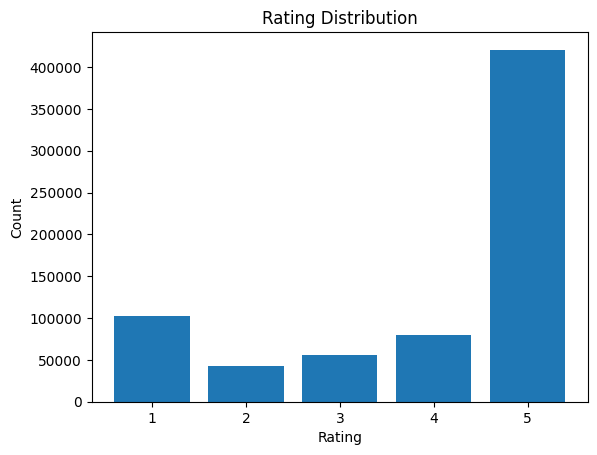

In [63]:
rating_counts = (
    reviews_df.groupBy("rating")
    .count()
    .orderBy("rating")
)

pdf = rating_counts.toPandas()

import matplotlib.pyplot as plt

plt.figure()
plt.bar(pdf["rating"], pdf["count"])
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [50]:
reviews_df.groupBy("verified_purchase").count().show()

+-----------------+------+
|verified_purchase| count|
+-----------------+------+
|             true|634969|
|            false| 66559|
+-----------------+------+



In [51]:
from pyspark.sql.functions import length

reviews_df.select(length("text").alias("text_length")).describe().show()

+-------+------------------+
|summary|       text_length|
+-------+------------------+
|  count|            701528|
|   mean|173.03164093236478|
| stddev|246.92464466018657|
|    min|                 0|
|    max|             14989|
+-------+------------------+



In [53]:
reviews_df.groupBy("user_id", "asin", "timestamp").count().orderBy("count", ascending=False).show(5)

+--------------------+----------+-------------+-----+
|             user_id|      asin|    timestamp|count|
+--------------------+----------+-------------+-----+
|AHK3S32VWSXOBIYYF...|B008FR532U|1643563631330|   10|
|AHC4WQGKGVP5UQ2FR...|B074W1M23V|1628341545944|    8|
|AHUWZSKOOZ475MPMY...|B07CHB69Y3|1545362378685|    8|
|AHJEGTHANR23UG3PM...|B0873Y1WFZ|1633280872333|    8|
|AG2MWE5FOYGZUXGKF...|B00Q1BNG6C|1421927031000|    7|
+--------------------+----------+-------------+-----+
only showing top 5 rows



In [54]:
from pyspark.sql.functions import approx_count_distinct

reviews_df.select(
    approx_count_distinct("asin").alias("unique_products"),
    approx_count_distinct("user_id").alias("unique_users")
).show()

+---------------+------------+
|unique_products|unique_users|
+---------------+------------+
|         118162|      599604|
+---------------+------------+



In [56]:
print(reviews_df.select("parent_asin").distinct().count())
print(metadata_df.select("parent_asin").distinct().count())

112565
112590


In [57]:
missing = reviews_df.select("parent_asin").distinct() \
    .subtract(metadata_df.select("parent_asin").distinct())
missing.count()

0

In [58]:
metadata_df.select("price").show()

+-----+
|price|
+-----+
| NULL|
| NULL|
| NULL|
| NULL|
| NULL|
| 6.99|
| NULL|
| NULL|
|86.95|
| NULL|
| NULL|
| NULL|
| 79.5|
| NULL|
| NULL|
| NULL|
| 5.99|
| NULL|
| NULL|
| NULL|
+-----+
only showing top 20 rows



In [59]:
metadata_df.select(
    (sum(when(col("price").isNull(), 1).otherwise(0)) / metadata_df.count()).alias("null_rate")
).show()

+------------------+
|         null_rate|
+------------------+
|0.8427569055866418|
+------------------+



In [60]:
metadata_df.select("price").distinct().orderBy("price").show(50)

+-----+
|price|
+-----+
| NULL|
| 0.01|
| 0.12|
| 0.32|
| 0.33|
| 0.59|
| 0.89|
| 0.97|
| 0.98|
| 0.99|
|  1.0|
| 1.01|
|  1.2|
| 1.37|
| 1.39|
| 1.47|
| 1.49|
| 1.52|
| 1.56|
| 1.63|
| 1.69|
| 1.71|
| 1.75|
| 1.79|
|  1.8|
| 1.93|
| 1.95|
| 1.99|
| 10.0|
|10.01|
|10.02|
|10.04|
|10.05|
|10.06|
|10.08|
|10.09|
| 10.1|
|10.13|
|10.14|
|10.15|
|10.16|
|10.18|
|10.19|
|10.21|
|10.22|
|10.23|
|10.24|
|10.25|
|10.26|
|10.27|
+-----+
only showing top 50 rows



In [62]:
metadata_df.select("price").describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|             17704|
|   mean|27.255729778581603|
| stddev| 50.47201982517167|
|    min|              0.01|
|    max|             996.0|
+-------+------------------+



In [73]:
numeric_cols = ["average_rating", "rating_number", "price"]

num_pdf = metadata_df.select(numeric_cols).toPandas()

corr = num_pdf.corr()
corr

,average_rating,rating_number,price
average_rating,1.000000,0.057622,0.022587
rating_number,0.057622,1.000000,-0.026275
price,0.022587,-0.026275,1.000000
